##Ep=(Tp-Op)^2 learning rate 0.01, 0.5, 0.4 Implement the XOR gate operations using MLP and show the twist error propogation by iterating the learning rate , what i want from you is :
- there should be 2 inputs , n hidden anbd 1 output take n hidden layer and also take user input hidden layers and number of epochs
- use the feed forward netwrok
- calculate the mse Ep=(Tp-Op)^2
- then take a threshold valuend compare it with


Enter number of hidden neurons:  4
Enter number of epochs:  10



Initial Weights and Biases:
W1:
 [[-0.25091976  0.90142861  0.46398788  0.19731697]
 [-0.68796272 -0.68801096 -0.88383278  0.73235229]]
b1:
 [[0. 0. 0. 0.]]
W2:
 [[ 0.20223002]
 [ 0.41614516]
 [-0.95883101]
 [ 0.9398197 ]]
b2:
 [[0.]]

Epoch 1/10
Outputs:
 [[0.57436476]
 [0.63672249]
 [0.57735202]
 [0.64122254]]
MSE: 0.26291577441910563
Initial W1:
 [[-0.25091976  0.90142861  0.46398788  0.19731697]
 [-0.68796272 -0.68801096 -0.88383278  0.73235229]]
Initial b1:
 [[0. 0. 0. 0.]]
Initial W2:
 [[ 0.20223002]
 [ 0.41614516]
 [-0.95883101]
 [ 0.9398197 ]]
Initial b2:
 [[0.]]
W1 update:
 [[-8.96021272e-06 -6.35928912e-05  1.04098297e-04 -4.13369989e-05]
 [-2.24620247e-05 -7.38974831e-05  1.71779855e-04 -1.08154648e-04]]
b1 update:
 [[-4.21229216e-05 -1.31835736e-04  2.73989388e-04 -1.98093287e-04]]
W2 update:
 [[-0.00038441]
 [-0.00050349]
 [-0.00040818]
 [-0.00062595]]
b2 update:
 [[-0.0010077]]
Final W1:
 [[-0.25092872  0.90136502  0.46409198  0.19727563]
 [-0.68798518 -0.68808486 -0.883

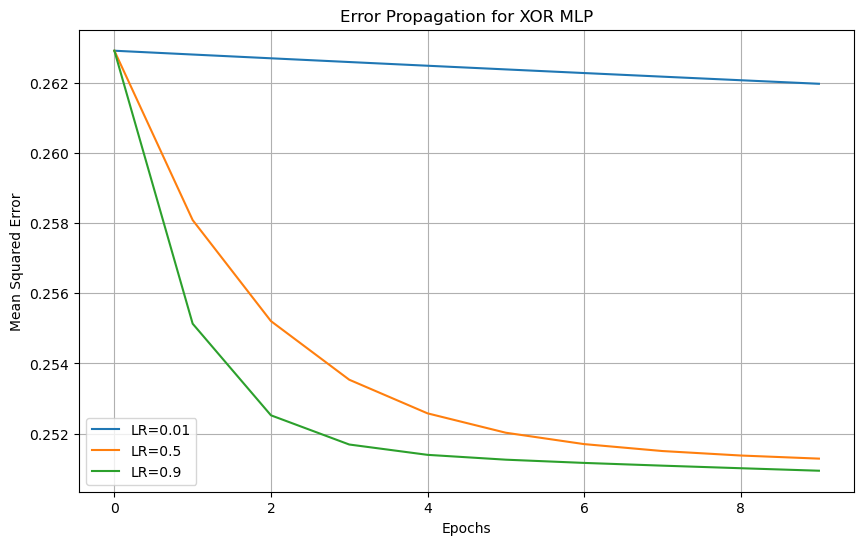


=== Optimal Solution ===
Learning Rate: 0.9
Epochs: 10
Final MSE: 0.2509418875405547
Predictions:
 [[0]
 [1]
 [0]
 [1]]
Final W1:
 [[-0.24657373  0.87816128  0.49801707  0.2217815 ]
 [-0.6929091  -0.71972717 -0.79483322  0.7018373 ]]
Final b1:
 [[-0.00493764 -0.04526543  0.09835399 -0.02535271]]
Final W2:
 [[ 0.13400094]
 [ 0.33198042]
 [-1.01600767]
 [ 0.79901902]]
Final b2:
 [[-0.20677321]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation and derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Training function with detailed logging
def train_xor(hidden_neurons=3, epochs=50, learning_rate=0.1, threshold=0.5, verbose=False):
    np.random.seed(42)
    input_dim = X.shape[1]
    output_dim = 1

    # Initialize weights and biases
    W1 = np.random.uniform(-1,1,(input_dim, hidden_neurons))
    b1 = np.zeros((1, hidden_neurons))
    W2 = np.random.uniform(-1,1,(hidden_neurons, output_dim))
    b2 = np.zeros((1, output_dim))

    if verbose:
        print("\nInitial Weights and Biases:")
        print("W1:\n", W1)
        print("b1:\n", b1)
        print("W2:\n", W2)
        print("b2:\n", b2)

    errors = []

    for epoch in range(epochs):
        # Forward pass
        hidden_input = np.dot(X, W1) + b1
        hidden_output = sigmoid(hidden_input)
        final_input = np.dot(hidden_output, W2) + b2
        final_output = sigmoid(final_input)

        # Error
        error = y - final_output
        mse = np.mean(error**2)
        errors.append(mse)

        # Backpropagation
        d_output = error * sigmoid_derivative(final_output)
        d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)

        # Weight updates
        W2_update = hidden_output.T.dot(d_output) * learning_rate
        b2_update = np.sum(d_output, axis=0, keepdims=True) * learning_rate
        W1_update = X.T.dot(d_hidden) * learning_rate
        b1_update = np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

        if verbose:
            print(f"\nEpoch {epoch+1}/{epochs}")
            print("Outputs:\n", final_output)
            print("MSE:", mse)

            # Print initial weights before update
            print("Initial W1:\n", W1)
            print("Initial b1:\n", b1)
            print("Initial W2:\n", W2)
            print("Initial b2:\n", b2)

            # Print updates
            print("W1 update:\n", W1_update)
            print("b1 update:\n", b1_update)
            print("W2 update:\n", W2_update)
            print("b2 update:\n", b2_update)

        # Apply updates
        W2 += W2_update
        b2 += b2_update
        W1 += W1_update
        b1 += b1_update

        if verbose:
            # Print final weights after update
            print("Final W1:\n", W1)
            print("Final b1:\n", b1)
            print("Final W2:\n", W2)
            print("Final b2:\n", b2)

    predictions = (final_output > threshold).astype(int)

    if verbose:
        print("\nFinal Weights and Biases after all epochs:")
        print("W1:\n", W1)
        print("b1:\n", b1)
        print("W2:\n", W2)
        print("b2:\n", b2)

    return final_output, predictions, errors, W1, b1, W2, b2

# Plotting function with optimal solution
def plot_errors(learning_rates, hidden_neurons=3, epochs=50):
    results = {}
    plt.figure(figsize=(10,6))
    for lr in learning_rates:
        outputs, preds, errors, W1, b1, W2, b2 = train_xor(
            hidden_neurons=hidden_neurons, epochs=epochs, learning_rate=lr, verbose=True
        )
        plt.plot(errors, label=f'LR={lr}')
        results[lr] = {
            "final_mse": errors[-1],
            "predictions": preds,
            "weights": (W1, b1, W2, b2),
            "epochs": epochs
        }
    plt.title('Error Propagation for XOR MLP')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Find optimal solution
    optimal_lr = min(results, key=lambda lr: results[lr]["final_mse"])
    optimal = results[optimal_lr]

    print("\n=== Optimal Solution ===")
    print("Learning Rate:", optimal_lr)
    print("Epochs:", optimal["epochs"])
    print("Final MSE:", optimal["final_mse"])
    print("Predictions:\n", optimal["predictions"])
    W1, b1, W2, b2 = optimal["weights"]
    print("Final W1:\n", W1)
    print("Final b1:\n", b1)
    print("Final W2:\n", W2)
    print("Final b2:\n", b2)

# ---- USER INPUT ----
hidden_neurons = int(input("Enter number of hidden neurons: "))
epochs = int(input("Enter number of epochs: "))

# Example usage
plot_errors([0.01, 0.5, 0.9], hidden_neurons=hidden_neurons, epochs=epochs)